In [152]:
from scipy.interpolate import make_splrep
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Parameters

In [178]:
# define spacing for Refract model (up to 19 possible spacings)
actual_spacing = 3 # Actual first 
first_spacing = 2 # First spacing used in the Refract model. Does not have 
max_spacing = 30 # Actual maximum spacing used in survey

files = ['west_1.csv','west_2.csv','west_3.csv','oaks_1.csv'] # csv files for analysis

factors = np.array([1,1.47,2.15,3.16,4.64,6.81,10,14.7,21.5,31.6,46.4,68.1,100,147,215,316,464,681,1000])
model_spacing_all = first_spacing*factors
model_spacing = [i for i in model_spacing_all if i <= 30]

### Functions

In [159]:
# import file function
def import_data(file):
    data_raw = pd.read_csv(file,header=None) #column 1 = spacing, column 2 = apparent resistivity
    data_np_unflipped = data_raw.to_numpy()
    data = np.swapaxes(data_np_unflipped,0,1)
    return data

In [160]:
# interpolate function
def interpolate(data,model_spacing,spltype=3):
    spacing = data[0]
    resistivity = data[1]
    spline = make_splrep(spacing,resistivity,k=spltype)
    interp_data = spline(model_spacing)
    return interp_data

### Data Processing

In [176]:
for file in files:
    data = import_data(file)
    data_interp = interpolate(data,model_spacing,spltype=3)
    label = file.split('.')[0]
    np.savetxt(label+'_interp.csv', np.swapaxes(np.array([model_spacing,data_interp]),0,1), delimiter = ",")

### Test Interpolation Results

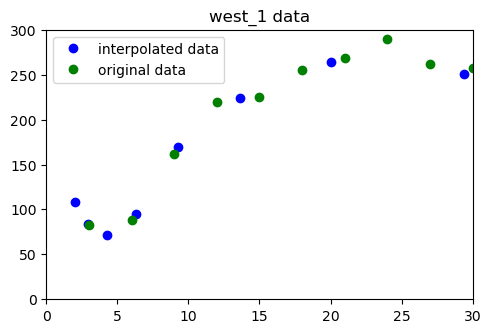

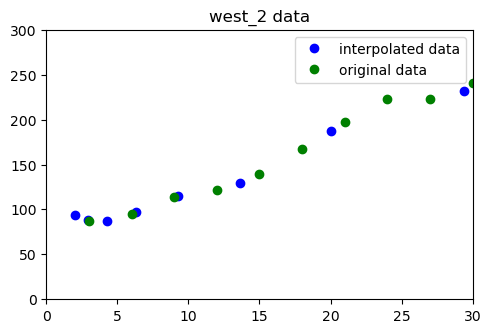

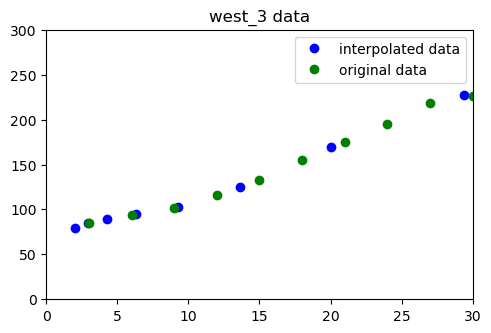

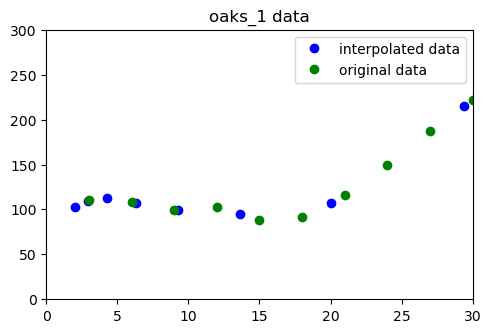

In [175]:
# For each dataset, plot actual data vs interpolation results
for file in files:
    fig, ax = plt.subplots(figsize=(5.5,3.5))
    data_o = import_data(file) # original data
    label = file.split('.')[0]
    data_i = import_data(label+'_interp.csv')
    ax.plot(data_i[0], data_i[1], 'o', label='interpolated data',color='blue')
    ax.plot(data_o[0],data_o[1],'o',label='original data',color='green')
    ax.set_xlim(0,30)
    ax.set_ylim(0,300)
    ax.set_title(label+' data')
    ax.legend()